In [2]:
import pandas
import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, 'Min and Max Temperature')

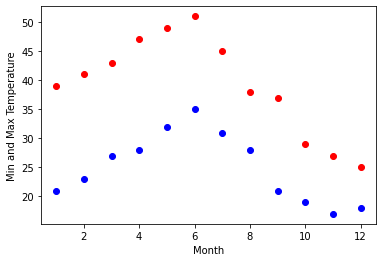

In [7]:
# scipy
months = np.arange(1,13)
temp_max = [39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25]
temp_min = [21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18]
plt.plot(months,temp_max,'ro')
plt.plot(months,temp_min,'bo')
plt.xlabel('Month')
plt.ylabel('Min and Max Temperature')

In [8]:
from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,
                                      temp_max, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,
                                      temp_min, [-40, 20, 0])


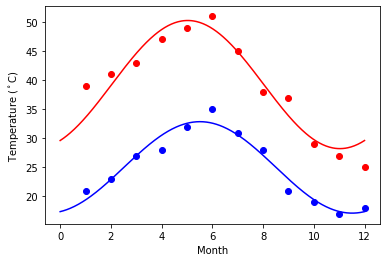

In [9]:
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, temp_max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, temp_min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

In [4]:
# matplotlib
df = pd.read_csv('titanic_original.csv')
df.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [32]:
df['sex'].value_counts()

male      843
female    466
Name: sex, dtype: int64

([<matplotlib.patches.Wedge at 0x2001d4845c0>,
 [Text(-0.48083677220945115, 0.9893411941747885, 'male'),
  Text(0.48083667958064136, -0.9893412391939719, 'female')])

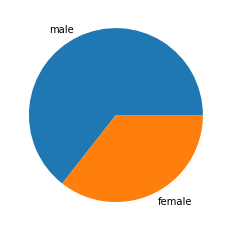

In [33]:
sizes = [843,466]
labels = ['male','female']
fig,ax = plt.subplots()
ax.pie(sizes,labels=labels)

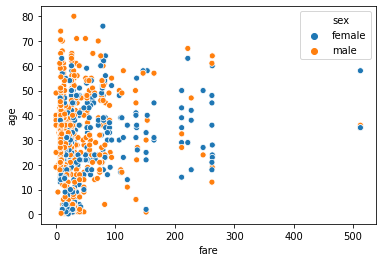

In [39]:
import seaborn as sns
sns.scatterplot(df['fare'],df['age'],hue=df['sex'])

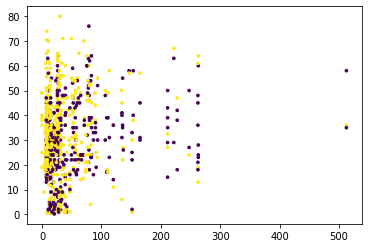

In [56]:
male = pd.get_dummies(df['sex'])
plt.scatter(df.fare,df.age,c=male.male,s=7)
